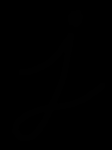

In [2]:

from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

def rgb2gray(rgb):
    r, g, b = rgb[:,:,0], rgb[:,:,1], rgb[:,:,2]
    gray = 0.2989 * r + 0.5870 * g + 0.1140 * b
    return gray

def gray2binary(gray):
    return (127 < gray) & (gray <= 255)



def dilation(image,kernel):
    img_row,img_column=image.shape
    #kernel_size=kernel.shape[0]
    #padding_width=(kernel_size-1)//2
    output=np.zeros(image.shape)
    padded_image=np.zeros((img_row+kernel.shape[0]-1,img_column+kernel.shape[1]-1))
    padded_image[kernel.shape[0]-1:kernel.shape[0]-1+img_row,kernel.shape[1]-1:kernel.shape[1]-1+img_column]=image
    for j in range(img_column):
        for i in range(img_row):
            value=np.sum(padded_image[i:i+kernel.shape[0],j:j+kernel.shape[1]]*kernel)
            if value>0:
                output[i,j]=1
            else :
                output[i,j]=0
    return output

def erosion(image,kernel):
    img_row,img_column=image.shape
    #kernel_size=kernel.shape[0]
    #padding_width=(kernel_size-1)//2
    output=np.zeros(image.shape)
    padded_image=np.zeros((img_row+kernel.shape[0]-1,img_column+kernel.shape[1]-1))
    padded_image[kernel.shape[0]-1:kernel.shape[0]-1+img_row,kernel.shape[1]-1:kernel.shape[1]-1+img_column]=image
    for j in range(img_column):
        for i in range(img_row):
            value1=np.sum(padded_image[i:i+kernel.shape[0],j:j+kernel.shape[1]]*kernel)
            if value1==5:
                output[i,j]=1
            else :
                output[i,j]=0
    return output



structured=np.array([[0, 1, 0],
                 [1, 1, 1],
                  [0, 1, 0]])



file="morphological.png"
im=gray2binary(rgb2gray(np.array(Image.open(file))))
#intensity = [[sum(im[x, y]) / 3 for y in range(im.shape[1])] for x in range(im.shape[0])]
imd=dilation(im,structured)
ime=erosion(im,structured)
new_img_d=Image.fromarray(imd).convert('RGB')
new_img_e=Image.fromarray(ime).convert('RGB')
new_img_d.save('dilation.png')
new_img_e.save('erosion.png')
Image.open('dilation.png')
Image.open('erosion.png')